# Using the IPCC-Atlas reference grids in R.

## *Grupo de Meteorología. Instituto de Física de Cantabria (CSIC-UC). Santander, Spain*

This is a simple example where the IPCC-Atlas reference grids are used in R for both interpolation and land/sea separation. 

## Load the reference grid/mask

In [61]:
library(loadeR)
library(visualizeR)

In [62]:
out.dir <- ""
mask <- loadGridData(paste0(out.dir, "land_sea_mask_1degree.nc4"), var = "sftlf")

[2020-02-11 14:58:19] Defining geo-location parameters
[2020-02-11 14:58:19] Defining time selection parameters
NOTE: Undefined Dataset Time Axis (static variable)
[2020-02-11 14:58:19] Retrieving data subset ...
[2020-02-11 14:58:19] Done


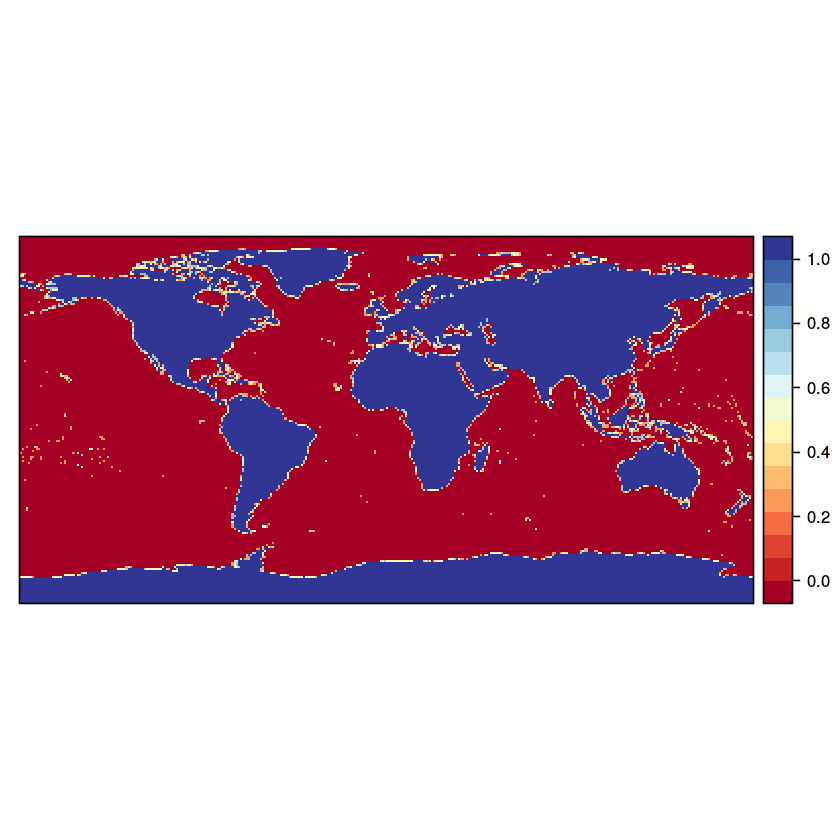

In [63]:
spatialPlot(mask)

## Load data

Here we use the example data provided in the *man* folder (https://github.com/SantanderMetGroup/ATLAS/tree/devel/man): `CMIP6Amon_tas_CanESM5_r1i1p1f1_historical_gn_185001-201412.nc`

In [64]:
tas <- loadGridData("CMIP6Amon_tas_CanESM5_r1i1p1f1_historical_gn_185001-201412.nc", var = "tas", years = 1995:2014)


[2020-02-11 14:58:20] Defining geo-location parameters
[2020-02-11 14:58:20] Defining time selection parameters
[2020-02-11 14:58:20] Retrieving data subset ...
[2020-02-11 14:58:21] Done


[2020-02-11 14:58:21] - Computing climatology...
[2020-02-11 14:58:21] - Done.


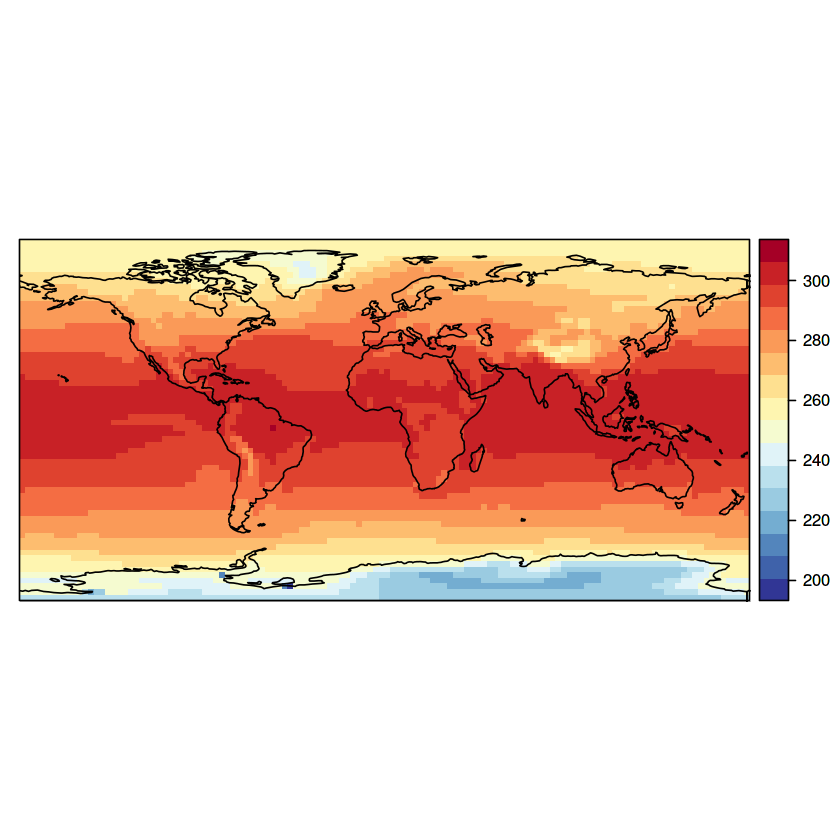

In [65]:
spatialPlot(climatology(tas), backdrop.theme = "coastline", rev.colors = TRUE)

## Interpolation

Use function `interpGrid` for interpolation:

In [66]:
tas.i <- interpGrid(tas, getGrid(mask), method = "bilinear")

Warning message in interpGrid(tas, getGrid(mask), method = "bilinear"):
“The new longitudes are outside the data extent”Warning message in interpGrid(tas, getGrid(mask), method = "bilinear"):
“The new latitudes are outside the data extent”[2020-02-11 14:58:21] Performing bilinear interpolation... may take a while
[2020-02-11 14:58:52] Done


## Apply the mask to the data

Function `binaryGrid` allows to assign the desired two values (here NA and 1) based on a threshold and condition. Here we obtain a grid with value 1 for the land and NA for sea:

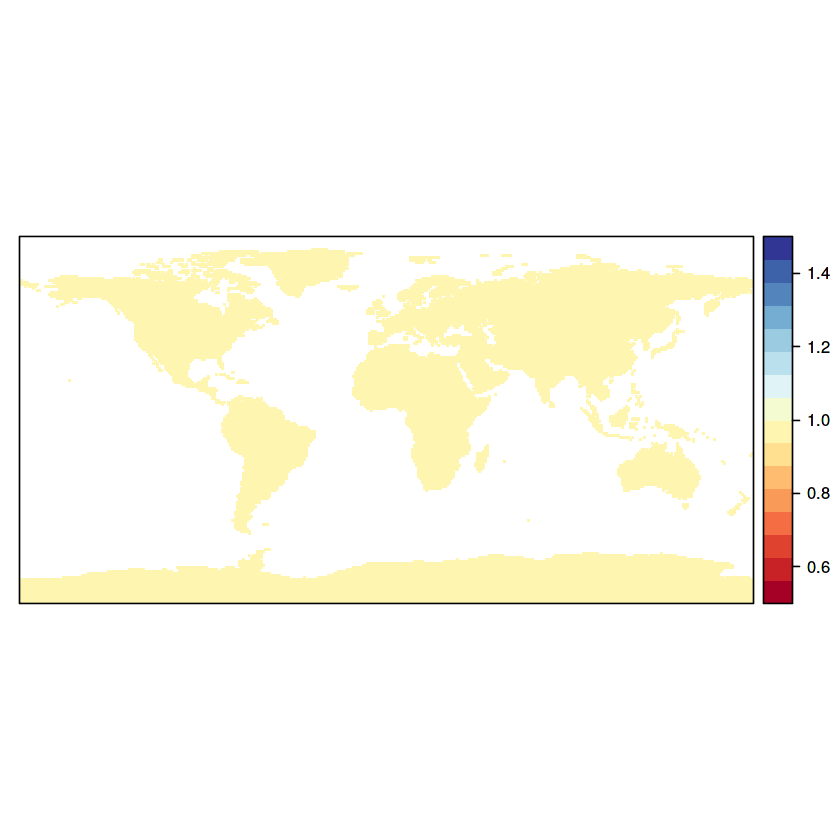

In [67]:
land <- binaryGrid(mask, condition = "GT", threshold = 0.999, values = c(NA, 1))
spatialPlot(land)

We need to have the same array dimensions in the mask to be applied and the target data. Here we redimensionate the mask to match the time dimension of the target data:

In [68]:
masktimes <- rep(list(land), getShape(tas, "time"))
mask2apply <- bindGrid(masktimes, dimension = "time")

Warning message in value[[3L]](cond):
“time dimension could not be sorted!”

At this point we are able to apply `gridArithmetics`, here performing the multiplication of the mask and the target data.

In [69]:
tas.i.land <- gridArithmetics(tas.i, mask2apply, operator = "*")

[2020-02-11 14:58:57] - Computing climatology...
[2020-02-11 14:58:57] - Done.


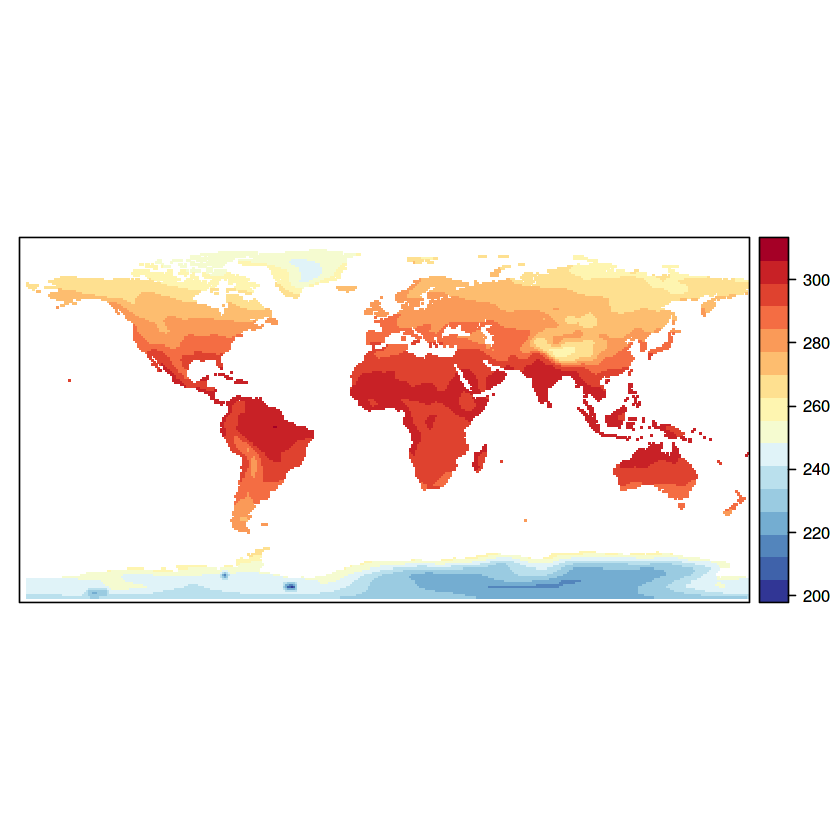

In [70]:
spatialPlot(climatology(tas.i.land), rev.colors = TRUE)

Next we compare the time series of the global mean temperature for land and sea (non masked: `tas.i`) and for land only(masked: `tas.i.land`):

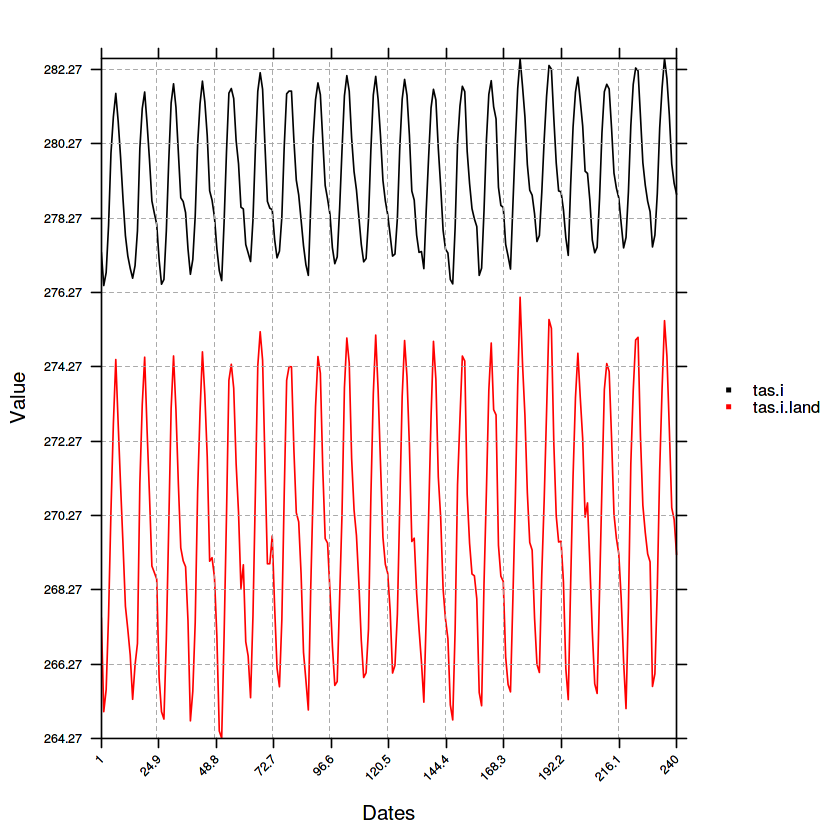

In [71]:
temporalPlot(tas.i, tas.i.land, x.axis = "index")

Function `gridArithmetics` can be used for any arithmetical operation among C4R grids and values, e.g. for unit changing:

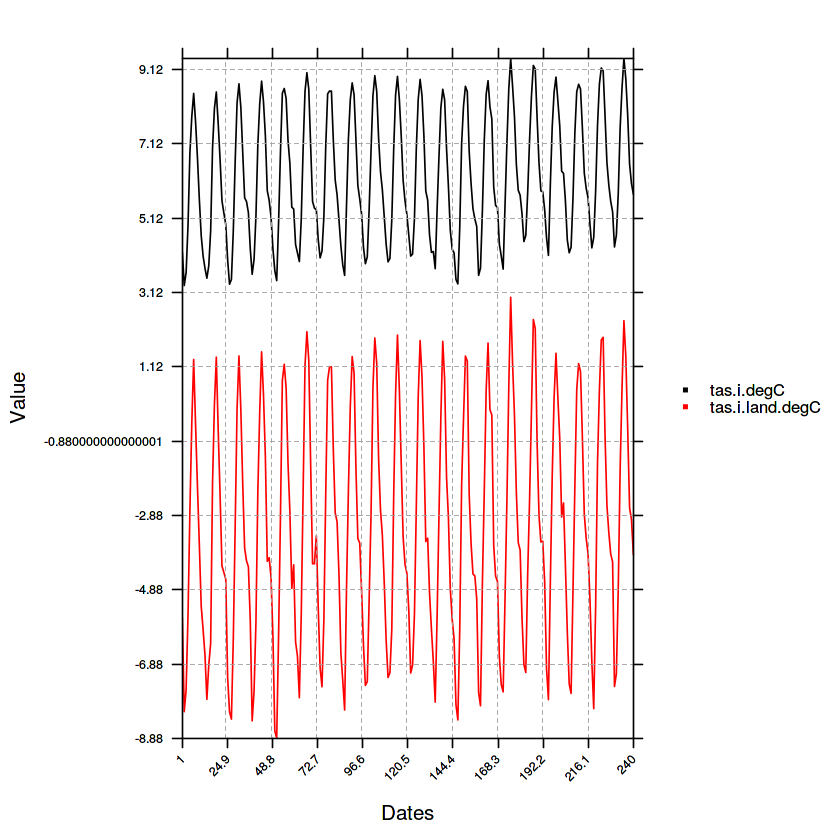

In [72]:
tas.i.land.degC <- gridArithmetics(tas.i.land, 273.15, operator = "-")
tas.i.degC <- gridArithmetics(tas.i, 273.15, operator = "-")
temporalPlot(tas.i.degC, tas.i.land.degC, x.axis = "index")